<a href="https://colab.research.google.com/github/sherinshibu111/Internship-23/blob/main/Background%20Study/samplecodeintern2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import networkx as nx

In [ ]:
# Load the dataset
data = r"/content/diabetes.csv"
df = pd.read_csv(data)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Create a new column named "source" and assign the source nodes to the new column
df["target"] = df["Glucose"]

In [ ]:
# Create a graph from the dataset
G = nx.from_pandas_edgelist(df)

In [ ]:
# Run the Girvan-Newman algorithm
communities = list(nx.community.girvan_newman(G))

In [ ]:
# If there are no communities, assign a community label of -1 to each row in the DataFrame
if not communities:
    df["community"] = -1

# Otherwise, add the community labels to the dataframe
else:
    df["community"] = communities

In [ ]:
# Save the dataframe
df.to_csv("diabetes_with_communities.csv")

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
# Load the karate karate club dataset with communities
df = pd.read_csv("diabetes_with_communities.csv")

In [ ]:
# Create a new column named "source" and assign the source nodes to the new column
df["target"] = df["Glucose"]

# Create a graph from the dataset
G = nx.from_pandas_edgelist(df)

In [ ]:
# Get the community labels for each node
communities = df["community"].tolist()

In [ ]:
# Create a node color list based on the community labels
node_colors = ["#D4FCB1" if community == 0 else "#CDC5FC" for community in communities]

In [ ]:
# Remove the extra node colors
node_colors = node_colors[:382]


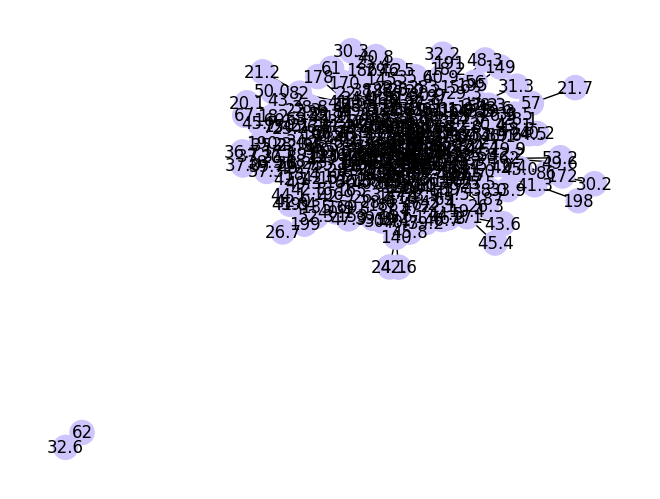

In [ ]:
# Visualize the graph
nx.draw(G, node_color=node_colors, with_labels=True)
plt.show()